In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
from pymc3.ode import DifferentialEquation
from scipy.integrate import odeint
from scipy.interpolate import interp1d

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
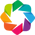

In [2]:
import holoviews as hv
hv.notebook_extension('bokeh')
hv.renderer('bokeh').theme = 'dark_minimal'
%opts Overlay [aspect=5/3, responsive=True]

In [59]:
pm.__version__

'3.8'

In [3]:
def plot_trace(trace, varnames=None):
    plots = []
    for var in varnames or [var for var in trace.varnames if not var.endswith('_')]:
        x = trace.get_values(var, combine=False)
        plots.append(hv.Overlay([hv.Distribution(xi, [var], [f'p({var})']) for xi in x], group=var).options(aspect=3))
        plots.append(hv.Overlay([hv.Curve(xi, 'index', var).options(alpha=0.6) for xi in x]).options(aspect=3))
    return hv.Layout(plots).cols(2)

In [4]:
def freefall(y, t, p):
    return 2.0*p[1] - p[0]*y[0]

# Times for observation
times = np.arange(0,10,0.5)
gamma, g, y0, sigma = 0.4, 9.8, -2, 2
y = odeint(freefall, t=times, y0=y0, args=tuple([[gamma,g]]))
yobs = np.random.normal(y,2)

In [5]:
true_and_data = hv.Curve((times, y[:, 0]), 'time (seconds)', 'y(t)', label='true speed') * hv.Scatter((times, yobs[:, 0]), label='observed speed').options(color='red', size=6)
true_and_data

:Overlay
   .Curve.True_speed       :Curve   [time (seconds)]   (y(t))
   .Scatter.Observed_speed :Scatter   [x]   (y)

In [6]:
ode_model = DifferentialEquation(
    func=freefall,
    times=times,
    n_states=1, n_theta=2,
    t0=0
)

with pm.Model() as model:
    # Specify prior distributions for soem of our model parameters
    sigma = pm.HalfCauchy('sigma',1)
    gamma = pm.Lognormal('gamma',0,1)

    # If we know one of the parameter values, we can simply pass the value.
    ode_solution = ode_model(y0=[0], theta=[gamma, 9.8])
    # The ode_solution has a shape of (n_times, n_states)

    Y = pm.Normal('Y', mu=ode_solution, sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(2000, tune=1000)
    posterior_predictive = pm.sample_posterior_predictive(trace)

plot_trace(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, sigma]
100%|██████████| 8000/8000 [01:40<00:00, 79.61it/s]


:Layout
   .Sigma.I    :Overlay
      .Distribution.I   :Distribution   [sigma]   (p(sigma))
      .Distribution.II  :Distribution   [sigma]   (p(sigma))
      .Distribution.III :Distribution   [sigma]   (p(sigma))
      .Distribution.IV  :Distribution   [sigma]   (p(sigma))
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [index]   (sigma)
      .Curve.II  :Curve   [index]   (sigma)
      .Curve.III :Curve   [index]   (sigma)
      .Curve.IV  :Curve   [index]   (sigma)
   .Gamma.I    :Overlay
      .Distribution.I   :Distribution   [gamma]   (p(gamma))
      .Distribution.II  :Distribution   [gamma]   (p(gamma))
      .Distribution.III :Distribution   [gamma]   (p(gamma))
      .Distribution.IV  :Distribution   [gamma]   (p(gamma))
   .Overlay.II :Overlay
      .Curve.I   :Curve   [index]   (gamma)
      .Curve.II  :Curve   [index]   (gamma)
      .Curve.III :Curve   [index]   (gamma)
      .Curve.IV  :Curve   [index]   (gamma)

In [7]:
more_times = np.arange(0,15,0.5)
hv.Overlay([
    hv.Curve((more_times, odeint(freefall, t=more_times, y0=[0], args=([gamma_i, 9.8],))[:, 0]), 't', 'speed').options(alpha=0.02, color='lime')
    for gamma_i in trace['gamma'][::25]
]) * true_and_data

:Overlay
   .Curve.I                :Curve   [t]   (speed)
   .Curve.II               :Curve   [t]   (speed)
   .Curve.III              :Curve   [t]   (speed)
   .Curve.IV               :Curve   [t]   (speed)
   .Curve.V                :Curve   [t]   (speed)
   .Curve.VI               :Curve   [t]   (speed)
   .Curve.VII              :Curve   [t]   (speed)
   .Curve.VIII             :Curve   [t]   (speed)
   .Curve.IX               :Curve   [t]   (speed)
   .Curve.X                :Curve   [t]   (speed)
   .Curve.XI               :Curve   [t]   (speed)
   .Curve.XII              :Curve   [t]   (speed)
   .Curve.XIII             :Curve   [t]   (speed)
   .Curve.XIV              :Curve   [t]   (speed)
   .Curve.XV               :Curve   [t]   (speed)
   .Curve.XVI              :Curve   [t]   (speed)
   .Curve.XVII             :Curve   [t]   (speed)
   .Curve.XVIII            :Curve   [t]   (speed)
   .Curve.XIX              :Curve   [t]   (speed)
   .Curve.XX               :Curve   [t]   (speed)
   .Curve.XXI              :Curve   [t]   (speed)
   .Curve.XXII             :Curve   [t]   (speed)
   .Curve.XXIII            :Curve   [t]   (speed)
   .Curve.XXIV             :Curve   [t]   (speed)
   .Curve.XXV              :Curve   [t]   (speed)
   .Curve.XXVI             :Curve   [t]   (speed)
   .Curve.XXVII            :Curve   [t]   (speed)
   .Curve.XXVIII           :Curve   [t]   (speed)
   .Curve.XXIX             :Curve   [t]   (speed)
   .Curve.XXX              :Curve   [t]   (speed)
   .Curve.XXXI             :Curve   [t]   (speed)
   .Curve.XXXII            :Curve   [t]   (speed)
   .Curve.XXXIII           :Curve   [t]   (speed)
   .Curve.XXXIV            :Curve   [t]   (speed)
   .Curve.XXXV             :Curve   [t]   (speed)
   .Curve.XXXVI            :Curve   [t]   (speed)
   .Curve.XXXVII           :Curve   [t]   (speed)
   .Curve.XXXVIII          :Curve   [t]   (speed)
   .Curve.XXXIX            :Curve   [t]   (speed)
   .Curve.XL               :Curve   [t]   (speed)
   .Curve.XLI              :Curve   [t]   (speed)
   .Curve.XLII             :Curve   [t]   (speed)
   .Curve.XLIII            :Curve   [t]   (speed)
   .Curve.XLIV             :Curve   [t]   (speed)
   .Curve.XLV              :Curve   [t]   (speed)
   .Curve.XLVI             :Curve   [t]   (speed)
   .Curve.XLVII            :Curve   [t]   (speed)
   .Curve.XLVIII           :Curve   [t]   (speed)
   .Curve.XLIX             :Curve   [t]   (speed)
   .Curve.L                :Curve   [t]   (speed)
   .Curve.LI               :Curve   [t]   (speed)
   .Curve.LII              :Curve   [t]   (speed)
   .Curve.LIII             :Curve   [t]   (speed)
   .Curve.LIV              :Curve   [t]   (speed)
   .Curve.LV               :Curve   [t]   (speed)
   .Curve.LVI              :Curve   [t]   (speed)
   .Curve.LVII             :Curve   [t]   (speed)
   .Curve.LVIII            :Curve   [t]   (speed)
   .Curve.LIX              :Curve   [t]   (speed)
   .Curve.LX               :Curve   [t]   (speed)
   .Curve.LXI              :Curve   [t]   (speed)
   .Curve.LXII             :Curve   [t]   (speed)
   .Curve.LXIII            :Curve   [t]   (speed)
   .Curve.LXIV             :Curve   [t]   (speed)
   .Curve.LXV              :Curve   [t]   (speed)
   .Curve.LXVI             :Curve   [t]   (speed)
   .Curve.LXVII            :Curve   [t]   (speed)
   .Curve.LXVIII           :Curve   [t]   (speed)
   .Curve.LXIX             :Curve   [t]   (speed)
   .Curve.LXX              :Curve   [t]   (speed)
   .Curve.LXXI             :Curve   [t]   (speed)
   .Curve.LXXII            :Curve   [t]   (speed)
   .Curve.LXXIII           :Curve   [t]   (speed)
   .Curve.LXXIV            :Curve   [t]   (speed)
   .Curve.LXXV             :Curve   [t]   (speed)
   .Curve.LXXVI            :Curve   [t]   (speed)
   .Curve.LXXVII           :Curve   [t]   (speed)
   .Curve.LXXVIII          :Curve   [t]   (speed)
   .Curve.LXXIX            :Curve   [t]   (speed)
   .Curve.LXXX             :Curve   [t]  

In [8]:
y = np.array([
    odeint(freefall, t=more_times, y0=[0], args=([gamma_i, 9.8],))[:, 0]
    for gamma_i in trace['gamma']
]).T

y.sort(axis=1)
cum_prob = np.linspace(0, 1, y.shape[1])

x1 = np.linspace(0, 1, 1001)[1:-1]
y1 = interp1d(cum_prob, y)(x1)

x2 = 100 - 200 * abs(x1 - 0.5)

df = [{'t': more_times, 'speed': y, 'P': p} for y, p in zip(y1.T, x2)]

contours = hv.Contours(df, ['t', 'speed'], 'P').options(cmap='plasma', colorbar=True, show_legend=False, line_width=2, logz=True, cformatter='%.2g%%')

today_vline = hv.VLine(max(times)).options(color='grey', line_width=1, line_dash='dashed')

contours * true_and_data * today_vline

:Overlay
   .Contours.I             :Contours   [t,speed]   (P)
   .Curve.True_speed       :Curve   [time (seconds)]   (y(t))
   .Scatter.Observed_speed :Scatter   [x]   (y)
   .VLine.I                :VLine   [x,y]

In [10]:
with pm.Model() as model3:
    sigma = pm.HalfCauchy('sigma',1)
    gamma = pm.Lognormal('gamma',0,1)
    g = pm.Lognormal('g',pm.math.log(10),2)
    # Initial condition prior.  We think it is at rest, but will allow for perturbations in initial velocity.
    y0 = pm.Normal('y0', 0, 2)

    ode_solution = ode_model(y0=[y0], theta=[gamma, g])

    Y = pm.Normal('Y', mu=ode_solution, sd=sigma, observed=yobs)

    trace = pm.sample(2000, tune=1000)

plot_trace(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y0, g, gamma, sigma]
Sampling 4 chains, 13 divergences: 100%|██████████| 12000/12000 [11:37<00:00, 17.21draws/s]
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.701387706471488, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


:Layout
   .Y0.I        :Overlay
      .Distribution.I   :Distribution   [y0]   (p(y0))
      .Distribution.II  :Distribution   [y0]   (p(y0))
      .Distribution.III :Distribution   [y0]   (p(y0))
      .Distribution.IV  :Distribution   [y0]   (p(y0))
   .Overlay.I   :Overlay
      .Curve.I   :Curve   [index]   (y0)
      .Curve.II  :Curve   [index]   (y0)
      .Curve.III :Curve   [index]   (y0)
      .Curve.IV  :Curve   [index]   (y0)
   .Sigma.I     :Overlay
      .Distribution.I   :Distribution   [sigma]   (p(sigma))
      .Distribution.II  :Distribution   [sigma]   (p(sigma))
      .Distribution.III :Distribution   [sigma]   (p(sigma))
      .Distribution.IV  :Distribution   [sigma]   (p(sigma))
   .Overlay.II  :Overlay
      .Curve.I   :Curve   [index]   (sigma)
      .Curve.II  :Curve   [index]   (sigma)
      .Curve.III :Curve   [index]   (sigma)
      .Curve.IV  :Curve   [index]   (sigma)
   .Gamma.I     :Overlay
      .Distribution.I   :Distribution   [gamma]   (p(gamma))
      .Distribution.II  :Distribution   [gamma]   (p(gamma))
      .Distribution.III :Distribution   [gamma]   (p(gamma))
      .Distribution.IV  :Distribution   [gamma]   (p(gamma))
   .Overlay.III :Overlay
      .Curve.I   :Curve   [index]   (gamma)
      .Curve.II  :Curve   [index]   (gamma)
      .Curve.III :Curve   [index]   (gamma)
      .Curve.IV  :Curve   [index]   (gamma)
   .G.I         :Overlay
      .Distribution.I   :Distribution   [g]   (p(g))
      .Distribution.II  :Distribution   [g]   (p(g))
      .Distribution.III :Distribution   [g]   (p(g))
      .Distribution.IV  :Distribution   [g]   (p(g))
   .Overlay.IV  :Overlay
      .Curve.I   :Curve   [index]   (g)
      .Curve.II  :Curve   [index]   (g)
      .Curve.III :Curve   [index]   (g)
      .Curve.IV  :Curve   [index]   (g)

In [11]:
y = np.array([
    odeint(freefall, t=more_times, y0=[y0_i], args=([gamma_i, g_i],))[:, 0]
    for gamma_i, g_i, y0_i in zip(trace['gamma'], trace['g'], trace['y0'])
]).T

y.sort(axis=1)
cum_prob = np.linspace(0, 1, y.shape[1])

x1 = np.linspace(0, 1, 1001)[1:-1]
y1 = interp1d(cum_prob, y)(x1)

x2 = 100 - 200 * abs(x1 - 0.5)

df = [{'t': more_times, 'speed': y, 'P': p} for y, p in zip(y1.T, x2)]

contours = hv.Contours(df, ['t', 'speed'], 'P').options(cmap='plasma', colorbar=True, show_legend=False, line_width=2, logz=True, cformatter='%.2g%%')

today_vline = hv.VLine(max(times)).options(color='grey', line_width=1, line_dash='dashed')

contours * true_and_data * today_vline

:Overlay
   .Contours.I             :Contours   [t,speed]   (P)
   .Curve.True_speed       :Curve   [time (seconds)]   (y(t))
   .Scatter.Observed_speed :Scatter   [x]   (y)
   .VLine.I                :VLine   [x,y]

In [58]:
trace.get_values('gamma', combine=False)

[array([0.38114107, 0.35431327, 0.36418287, ..., 0.31471285, 0.3234255 ,
        0.30805283]),
 array([0.33847862, 0.32937603, 0.33124491, ..., 0.34134696, 0.34628996,
        0.3265966 ]),
 array([0.33152483, 0.36514457, 0.36396362, ..., 0.36254574, 0.3570946 ,
        0.35684539]),
 array([0.34758433, 0.34034845, 0.33056565, ..., 0.34621443, 0.36707256,
        0.32277779])]